In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
plt.style.use('seaborn')

In [23]:
data = pd.read_csv('data/Samuel Dysch 06-05-2022.csv', parse_dates=[['Date', 'Time']])
data.set_index(data['Date_Time'], inplace=True)
data.index = pd.to_datetime(data.index)
data = data.drop(['Date_Time', 'Index'], axis='columns')
data = data.iloc[::-1]
data.head(5)

,New Device Time,BG Source,BG Reading (mmol/L),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),Bolus Type,Bolus Volume Selected (U),...,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,BLE Network Device,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name,Unnamed: 50
Date_Time,,,,,,,,,,,,,,,,,,,,,
2021-11-27 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27 09:45:00,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27 09:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27 09:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27 09:46:38,NaN,ENTERED_IN_BOLUS_WIZRD,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# How much data is available?
data.index[0], data.index[-1]

(Timestamp('2021-11-27 09:45:00'), Timestamp('2022-05-06 22:09:00'))

In [39]:
# And how much is missing?
data.isna().sum() / len(data)

New Device Time                        0.999586
BG Source                              0.878434
BG Reading (mmol/L)                    0.878434
Linked BG Meter ID                     0.938183
Basal Rate (U/h)                       0.786246
Temp Basal Amount                      0.993711
Temp Basal Type                        0.993711
Temp Basal Duration (h:mm:ss)          0.993711
Bolus Type                             0.734939
Bolus Volume Selected (U)              0.736511
Bolus Volume Delivered (U)             0.868256
Bolus Duration (h:mm:ss)               0.997021
Prime Type                             0.986842
Prime Volume Delivered (U)             0.986842
Alarm                                  0.994538
Suspend                                0.985104
Rewind                                 0.993628
BWZ Estimate (U)                       0.830106
BWZ Target High BG (mmol/L)            0.830106
BWZ Target Low BG (mmol/L)             0.830106
BWZ Carb Ratio (g/U)                   0

# BG data

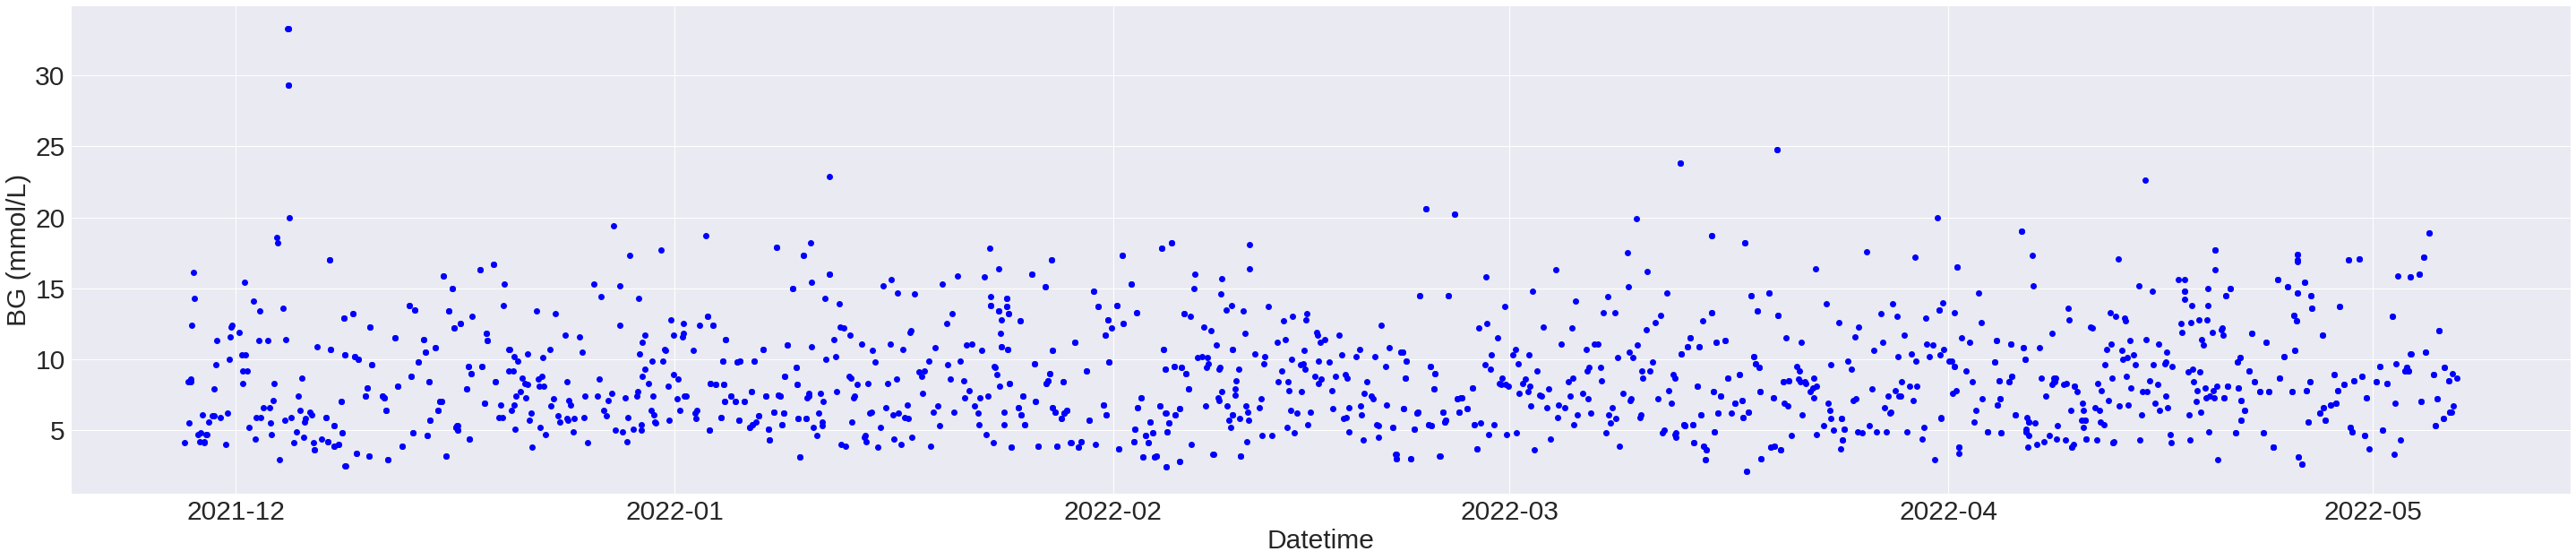

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
# ax.plot(data['Basal Rate (U/h)'].fillna(method='ffill'))
ax.plot(data['BG Reading (mmol/L)'], 'bo')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('BG (mmol/L)', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

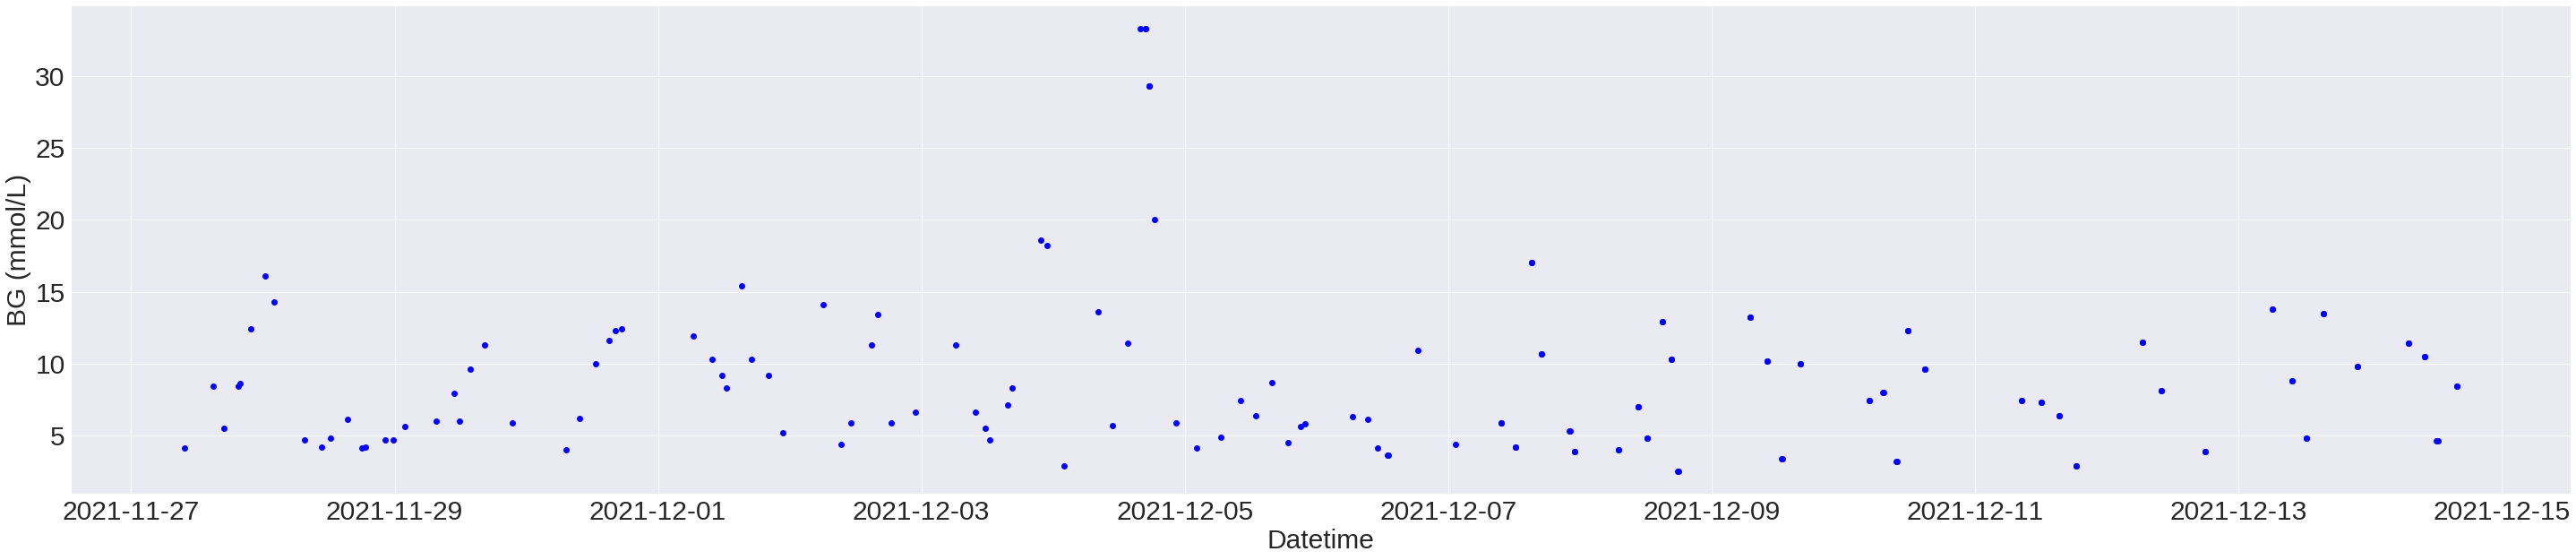

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
fraction = int(0.1 * len(data))
ax.plot(data['BG Reading (mmol/L)'].iloc[:fraction], 'bo')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('BG (mmol/L)', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

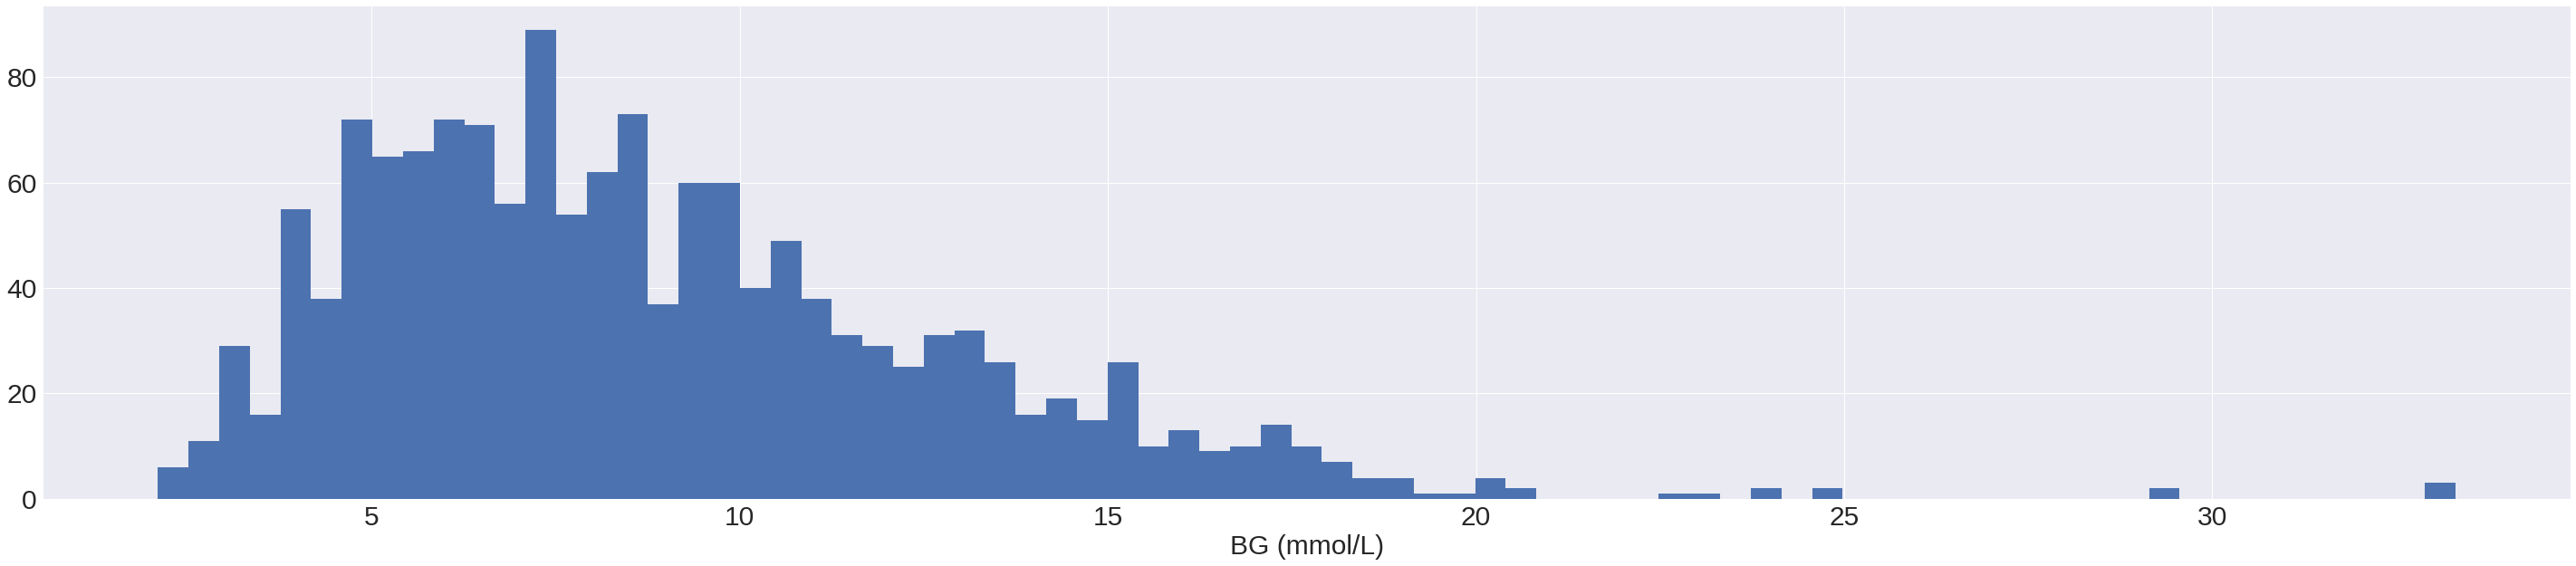

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.hist(data['BG Reading (mmol/L)'], bins=75)
ax.set_xlabel('BG (mmol/L)', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Bolus data

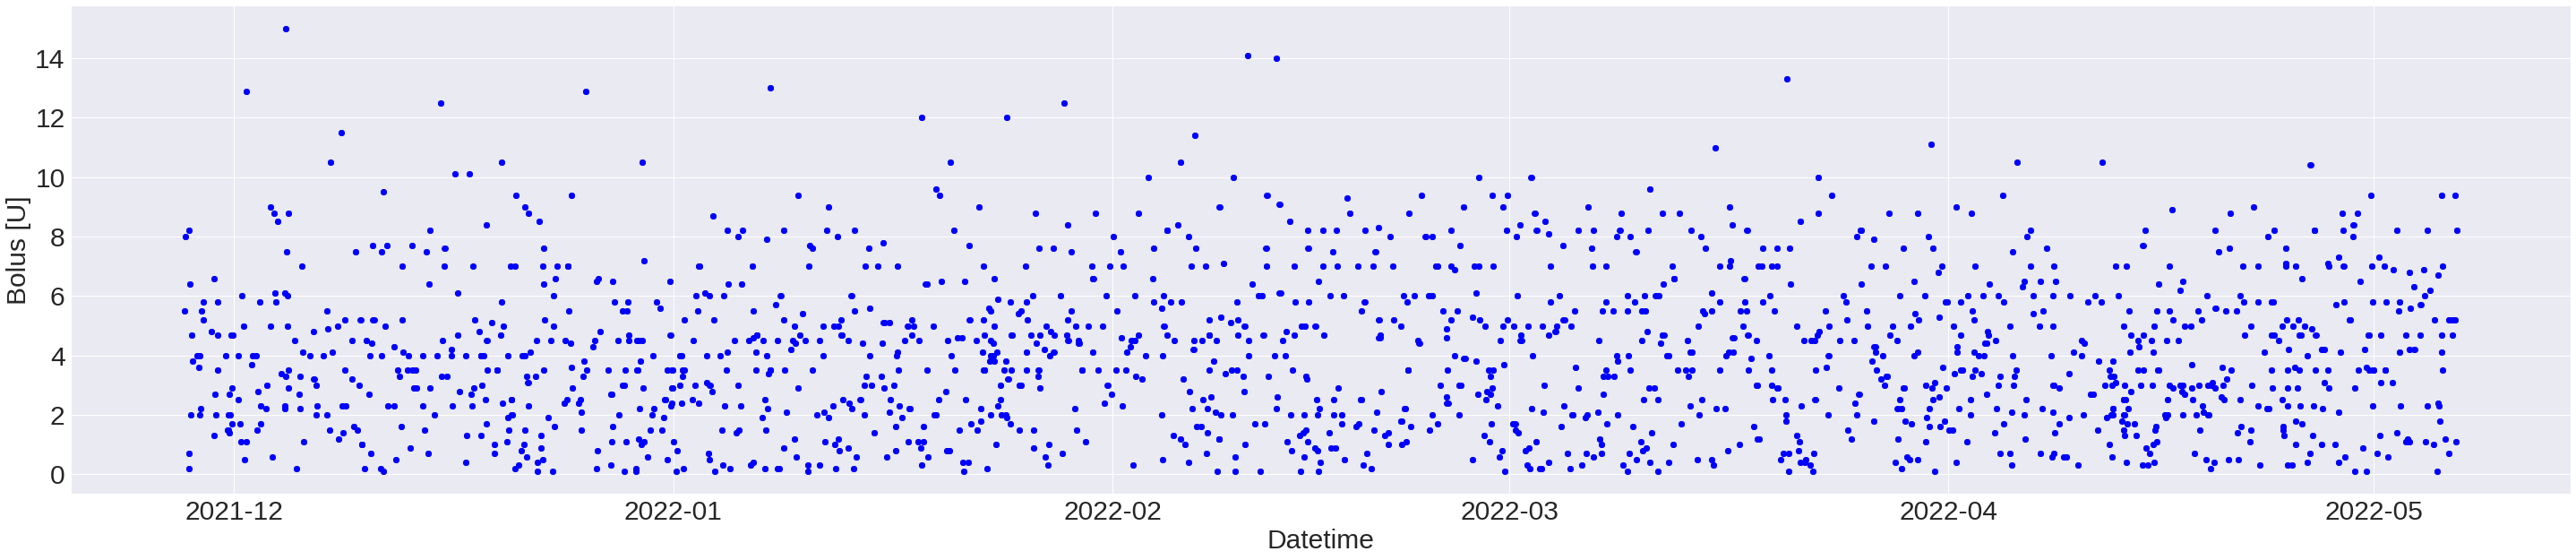

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.plot(data['Bolus Volume Selected (U)'], 'bo')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('Bolus [U]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

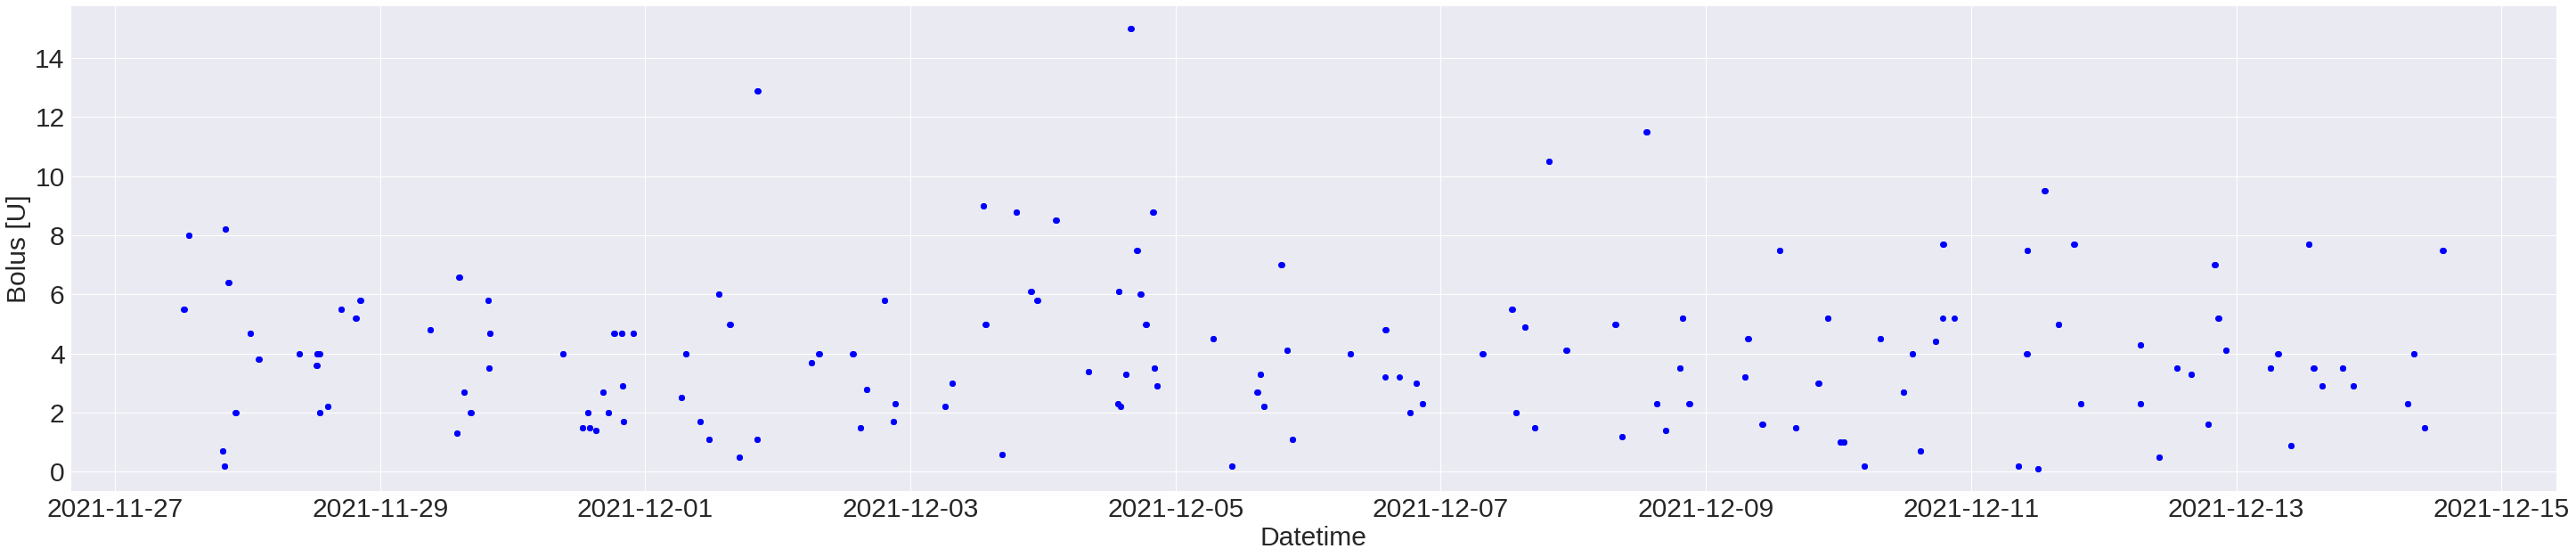

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
fraction = int(0.1 * len(data))
ax.plot(data['Bolus Volume Selected (U)'].iloc[:fraction], 'bo')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('Bolus [U]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

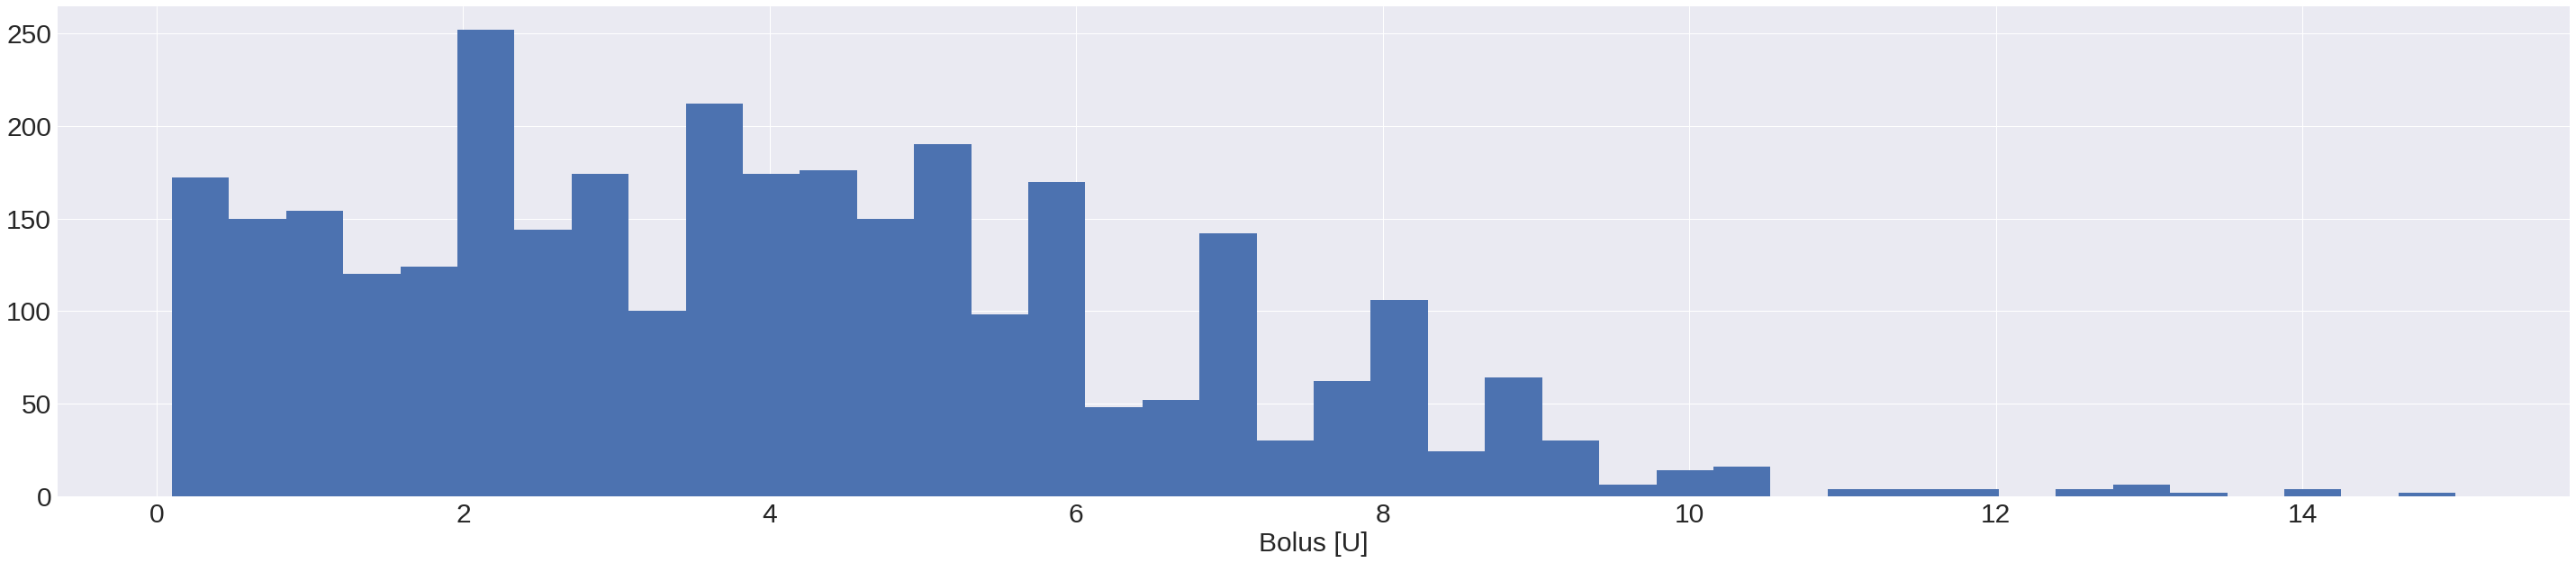

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.hist(data['Bolus Volume Selected (U)'], bins=40)
ax.set_xlabel('Bolus [U]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)